# Creating and analyzing extrasolar systems
---

*Author: Ema Donev, 2022*

In [1]:
# Basic libraries
import pickle
import os
import sys
from tqdm import tqdm
import gc

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties

# DataFrame analysis
import pandas as pd

# Math libraries
import numpy as np
import scipy as sc
from scipy.stats import norm

In [2]:
# CONFIGURATION
# -------------
sns.set_theme(style='white') # setting the theme for plotting
sys.path.insert(0,'../src/')
np.random.seed(42)

# configuring plotting colors
clr = ['#465BBB', '#3F8FCE', '#7ABBCE', '#3A3865', '#A82F43', '#612A37', '#DC5433', '#F29457']
b1 = '#465BBB'
b2 = '#3F8FCE'
b3 = '#7ABBCE'
b4 = '#3A3865'
black1 = '#22212A'
black2 = '#2D1E21'
or1 = '#A82F43'
or2 = '#612A37'
or3 = '#DC5433'
or4 = '#F29457'
clrs = sns.set_palette(sns.color_palette(clr))

# configuring fonts for plotting
font = FontProperties()
font.set_family('serif')
font.set_name('Andale Mono')
font.set_style('normal')

%matplotlib inline 

In [11]:
exo_data = pd.read_csv('../DATA/exoplanets_categorized.csv')

In [12]:
ht = exo_data[['hostname','exo_class_ext']].copy()
pt = pd.crosstab([ht['hostname']],[ht['exo_class_ext']],dropna=False)
pt = pd.DataFrame(pt)
print(pt.shape[0])
pt.head()

3709


exo_class_ext,Gas giant,Hot Jupiter,Hot Neptune,Neptune-like,Super-Earth,Terrestrial
hostname,,,,,,
11 Com,1,0,0,0,0,0
11 UMi,1,0,0,0,0,0
14 And,1,0,0,0,0,0
14 Her,2,0,0,0,0,0
16 Cyg B,1,0,0,0,0,0


In [13]:
pt.nunique()

exo_class_ext
Gas giant       5
Hot Jupiter     3
Hot Neptune     3
Neptune-like    6
Super-Earth     6
Terrestrial     6
dtype: int64

In [14]:
st = exo_data[['hostname','sy_snum','sy_pnum','st_met','st_teff']].copy()
st.drop_duplicates(inplace=True)
print(st.shape[0])
st.head()

3892


,hostname,sy_snum,sy_pnum,st_met,st_teff
0,11 Com,2,1,-0.35,4742.0
1,11 UMi,1,1,-0.02,4213.0
2,14 And,1,1,-0.24,4813.0
3,14 Her,1,2,0.41,5338.0
4,16 Cyg B,3,1,0.06,5750.0


In [15]:
st['check'] = st.groupby('hostname')['hostname'].transform('count')
st[st['check']>=2]

,hostname,sy_snum,sy_pnum,st_met,st_teff,check
3,14 Her,1,2,0.41,5338.00,2
51,BD+20 2457,1,2,-0.79,4259.00,2
52,BD+20 2457,1,2,-1.00,4137.00,2
65,BD-08 2823,1,2,-0.06,4816.00,2
66,BD-08 2823,1,2,-0.07,4746.00,2
...,...,...,...,...,...,...
4775,WASP-18,2,2,0.19,6400.00,2
4854,WASP-8,2,2,0.17,5600.00,2
4855,WASP-8,2,2,0.17,5690.00,2
4904,bet Pic,1,2,-0.21,8038.68,2


In [16]:
st['st_metallicity'] = st.groupby('hostname')['st_met'].transform('mean')
st = st.drop(['st_met'],axis=1)
st.drop_duplicates(inplace=True)

st['st_temperature'] = st.groupby('hostname')['st_teff'].transform('mean')
st = st.drop(['st_teff'],axis=1)
st.drop_duplicates(inplace=True)

print(st.shape[0], pt.shape[0])
st.head()

3711 3709


,hostname,sy_snum,sy_pnum,check,st_metallicity,st_temperature
0,11 Com,2,1,1,-0.3500,4742.00
1,11 UMi,1,1,1,-0.0200,4213.00
2,14 And,1,1,1,-0.2400,4813.00
3,14 Her,1,2,2,0.4075,5326.47
4,16 Cyg B,3,1,1,0.0600,5750.00


In [17]:
st['check'] = st.groupby('hostname')['hostname'].transform('count')
st[st['check']>=2]

,hostname,sy_snum,sy_pnum,check,st_metallicity,st_temperature


In [18]:
st = st.drop(['check'],axis=1)

st.head()

,hostname,sy_snum,sy_pnum,st_metallicity,st_temperature
0,11 Com,2,1,-0.3500,4742.00
1,11 UMi,1,1,-0.0200,4213.00
2,14 And,1,1,-0.2400,4813.00
3,14 Her,1,2,0.4075,5326.47
4,16 Cyg B,3,1,0.0600,5750.00


In [19]:
pt = pt.reset_index()

planetary_systems = pd.merge(st, pt, on='hostname',how='left')
planetary_systems.head()

,hostname,sy_snum,sy_pnum,st_metallicity,st_temperature,Gas giant,Hot Jupiter,Hot Neptune,Neptune-like,Super-Earth,Terrestrial
0,11 Com,2,1,-0.3500,4742.00,1.0,0.0,0.0,0.0,0.0,0.0
1,11 UMi,1,1,-0.0200,4213.00,1.0,0.0,0.0,0.0,0.0,0.0
2,14 And,1,1,-0.2400,4813.00,1.0,0.0,0.0,0.0,0.0,0.0
3,14 Her,1,2,0.4075,5326.47,2.0,0.0,0.0,0.0,0.0,0.0
4,16 Cyg B,3,1,0.0600,5750.00,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
planetary_systems.isnull().sum()

hostname            0
sy_snum             0
sy_pnum             0
st_metallicity    279
st_temperature    133
Gas giant           2
Hot Jupiter         2
Hot Neptune         2
Neptune-like        2
Super-Earth         2
Terrestrial         2
dtype: int64

# Categorization of stars by their spectral type
---

In [21]:
stellar = {pd.Interval(2400,3700,closed='left'):"M",
pd.Interval(3700,5200,closed='left'):'K',
pd.Interval(5200,6000,closed='left'):'G',
pd.Interval(6000,7500,closed='left'):'F',
pd.Interval(7500,10000,closed='left'):'A',
pd.Interval(10000,30000,closed='left'):'B',
pd.Interval(30000,100000,closed='left'):'O',
}

In [22]:
planetary_systems['st_spect'] = planetary_systems['st_temperature'].map(stellar)
planetary_systems.head()

,hostname,sy_snum,sy_pnum,st_metallicity,st_temperature,Gas giant,Hot Jupiter,Hot Neptune,Neptune-like,Super-Earth,Terrestrial,st_spect
0,11 Com,2,1,-0.3500,4742.00,1.0,0.0,0.0,0.0,0.0,0.0,K
1,11 UMi,1,1,-0.0200,4213.00,1.0,0.0,0.0,0.0,0.0,0.0,K
2,14 And,1,1,-0.2400,4813.00,1.0,0.0,0.0,0.0,0.0,0.0,K
3,14 Her,1,2,0.4075,5326.47,2.0,0.0,0.0,0.0,0.0,0.0,G
4,16 Cyg B,3,1,0.0600,5750.00,1.0,0.0,0.0,0.0,0.0,0.0,G


In [23]:
planetary_systems.st_spect.value_counts()

G    1693
K     977
F     708
M     163
A      19
B      10
O       3
Name: st_spect, dtype: int64

## Data analysis of stars
---

In [24]:
spectra1 = pd.crosstab(planetary_systems['st_spect'],planetary_systems['sy_pnum'])
pd.DataFrame(spectra1)
spectra1.head(10)

sy_pnum,1,2,3,4,5,6,7,8
st_spect,,,,,,,,
A,17,2,0,0,0,0,0,0
B,8,1,1,0,0,0,0,0
F,579,89,24,12,3,0,0,1
G,1293,258,99,27,11,5,0,0
K,752,151,42,18,11,3,0,0
M,111,30,15,5,1,0,1,0
O,1,2,0,0,0,0,0,0


In [27]:
cols = ['Gas giant','Neptune-like',	'Super-Earth',	'Terrestrial',	'Hot Jupiter',	'Hot Neptune']
ht = pd.DataFrame(index=planetary_systems.st_spect.unique())
for pl_type in cols: # 
    st_sum_pl = planetary_systems.groupby('st_spect')[pl_type].agg('sum').to_dict()
    ht[pl_type] = ht.index.map(st_sum_pl)
ht.dropna(inplace=True)
ht.sort_index(inplace=True)

In [28]:
ht

,Gas giant,Neptune-like,Super-Earth,Terrestrial,Hot Jupiter,Hot Neptune
A,8.0,2.0,1.0,0.0,10.0,0.0
B,7.0,0.0,0.0,2.0,1.0,0.0
F,111.0,255.0,293.0,28.0,202.0,9.0
G,312.0,814.0,760.0,79.0,253.0,69.0
K,294.0,334.0,507.0,51.0,96.0,40.0
M,28.0,50.0,132.0,17.0,6.0,15.0
O,5.0,0.0,0.0,0.0,0.0,0.0


---

In [29]:
def annotate_countplot(sp, df: pd.DataFrame(), perc_height:float, font_size:int=10):
    for p in sp.patches:
        height = p.get_height()
    
        sp.text(p.get_x() + p.get_width()/2., 
                height + len(df) * perc_height, height,
                ha = 'center', fontsize = font_size)

In [31]:
plt.rcParams.update({
    'font.serif': 'Andale Mono',
    'font.family': 'serif'
})

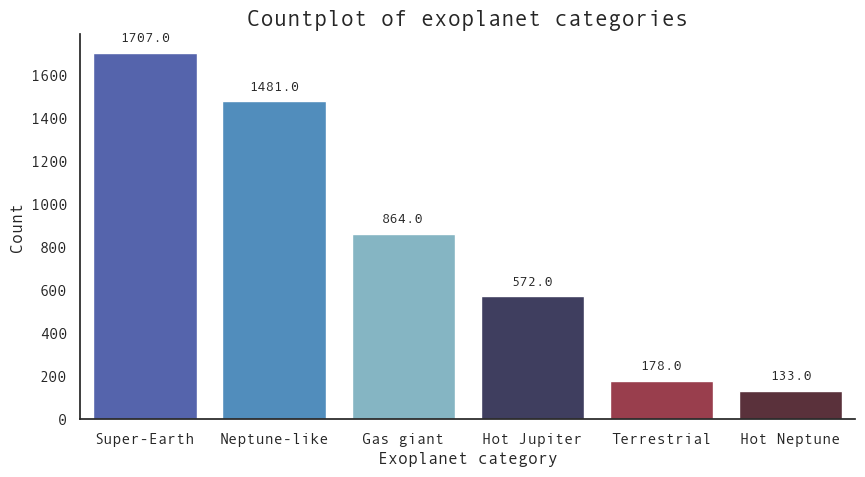

In [33]:
plt.figure(figsize=(10,5))
scp = sns.countplot(x=exo_data['exo_class_ext'],palette=clrs,data = exo_data,order=exo_data['exo_class_ext'].value_counts().index)
annotate_countplot(scp,exo_data,0.01)
sns.despine()
plt.xlabel('Exoplanet category', fontproperties=font, fontsize=12)
plt.ylabel('Count', fontproperties=font, fontsize=12)
plt.title('Countplot of exoplanet categories', fontproperties=font, fontsize=16)
plt.savefig('../img/exoplant_categories.png', dpi=300)
plt.show()